<a href="https://colab.research.google.com/github/Jhonald73/TPproj_github/blob/main/W2S2_Activities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    # This is the default and can be omitted
    api_key=api_key,
)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Automated Data Prep/laptop_prices_2024_sgd_TL.csv")

In [7]:
# Convert the first few rows to a string to send to OpenAI
data_preview = df.head(10).to_csv(index=False)
print(data_preview)

response = client.responses.create(
    model="gpt-4o-mini",
    instructions="You are an expert data scientist with extensive knowledge of predictive analysis and linear regression.",
    input=f"Dataset: laptop_prices_2024_sgd_TL (150 samples, 4 features, 3 classes)\nHere are the first 10 rows of the dataset:\n{data_preview}]",
)
print(response.output_text)

Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.8
Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.3
Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4080,32,SSD,256,False,3.34,17.3,8.94,2224.12,5,155.69
Acer,TravelMate P6,Intel i9-14900HK,NVIDIA RTX 4080,128,SSD,1024,True,1.11,13.3,11.72,3016.36,5,211.15
Acer,Predator Helios 300,Intel Core Ultra 9 15700H,NVIDIA RTX 4070,16,SSD,2048,True,1.29,13.3,8.84,2579.29,5,180.55
Acer,Swift 3,Intel i5-14500H,NVIDIA

### Interpretation of the Plot:

*   **Diagonal Line**: The red dashed line represents the ideal scenario where predicted values exactly match actual values. Points close to this line indicate accurate predictions.
*   **Clustering of Points**: The closer the scatter points are to the red dashed line, the better the model's performance. A tight clustering around this line indicates high accuracy.
*   **Spread of Points**: Any significant deviation from the red line suggests where the model might be overestimating or underestimating prices. A uniform spread along the line indicates homoscedasticity (consistent error variance), which is desirable for linear regression.

This plot visually confirms the high R-squared score, showing that the model's predictions are generally close to the actual prices across the range of values in the test set.

What parts of the code from APREP are specific to the dataset?
Answer: "input" code.

What parts needs to be modified to adapt to the new dataset?
Answer:You need a code to read a dataset from specific directory where its saved.

Is there a way to make it generic and adaptable to any new dataset?
Answer. A function call below

import pandas as pd

def load_dataset(path, target_col=None):
    df = pd.read_csv(path)




In [11]:
df.shape

(1000, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Model             1000 non-null   object 
 2   CPU               1000 non-null   object 
 3   GPU               1000 non-null   object 
 4   RAM_GB            1000 non-null   int64  
 5   Storage_Type      1000 non-null   object 
 6   Storage_GB        1000 non-null   int64  
 7   Touchscreen       1000 non-null   bool   
 8   Weight_kg         1000 non-null   float64
 9   Screen_Size_inch  1000 non-null   float64
 10  Discount_percent  1000 non-null   float64
 11  Price_SGD         1000 non-null   float64
 12  Brand_Discount    1000 non-null   int64  
 13  Member_Discount   1000 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(5)
memory usage: 102.7+ KB


In [13]:
df.isnull().sum()

,0
Brand,0
Model,0
CPU,0
GPU,0
RAM_GB,0
Storage_Type,0
Storage_GB,0
Touchscreen,0
Weight_kg,0
Screen_Size_inch,0


**Reasoning**:
To identify numerical and categorical features, I will use `select_dtypes` on the DataFrame and then remove the target variable 'Price_SGD' from both lists to prepare them for analysis.



In [8]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove 'Price_SGD' from both lists if present
if 'Price_SGD' in numerical_features:
    numerical_features.remove('Price_SGD')

if 'Price_SGD' in categorical_features:
    categorical_features.remove('Price_SGD')

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['RAM_GB', 'Storage_GB', 'Weight_kg', 'Screen_Size_inch', 'Discount_percent', 'Brand_Discount', 'Member_Discount']
Categorical Features: ['Brand', 'Model', 'CPU', 'GPU', 'Storage_Type', 'Touchscreen']


## Define Features and Target

### Subtask:
Select the identified important features ('RAM_GB', 'Storage_GB', 'Brand', 'CPU', 'GPU', 'Discount_percent', 'Brand_Discount', 'Member_Discount') as the independent variables (X) and 'Price_SGD' as the target variable (y).


## Visualize Correlations of Important Variables (Numerical and Categorical)

### Subtask:
Generate a `seaborn.pairplot` for a subset of the most important numerical features against 'Price_SGD', using a key categorical feature ('Brand') as `hue` to highlight its influence on the correlations.

<Figure size 1500x1500 with 0 Axes>

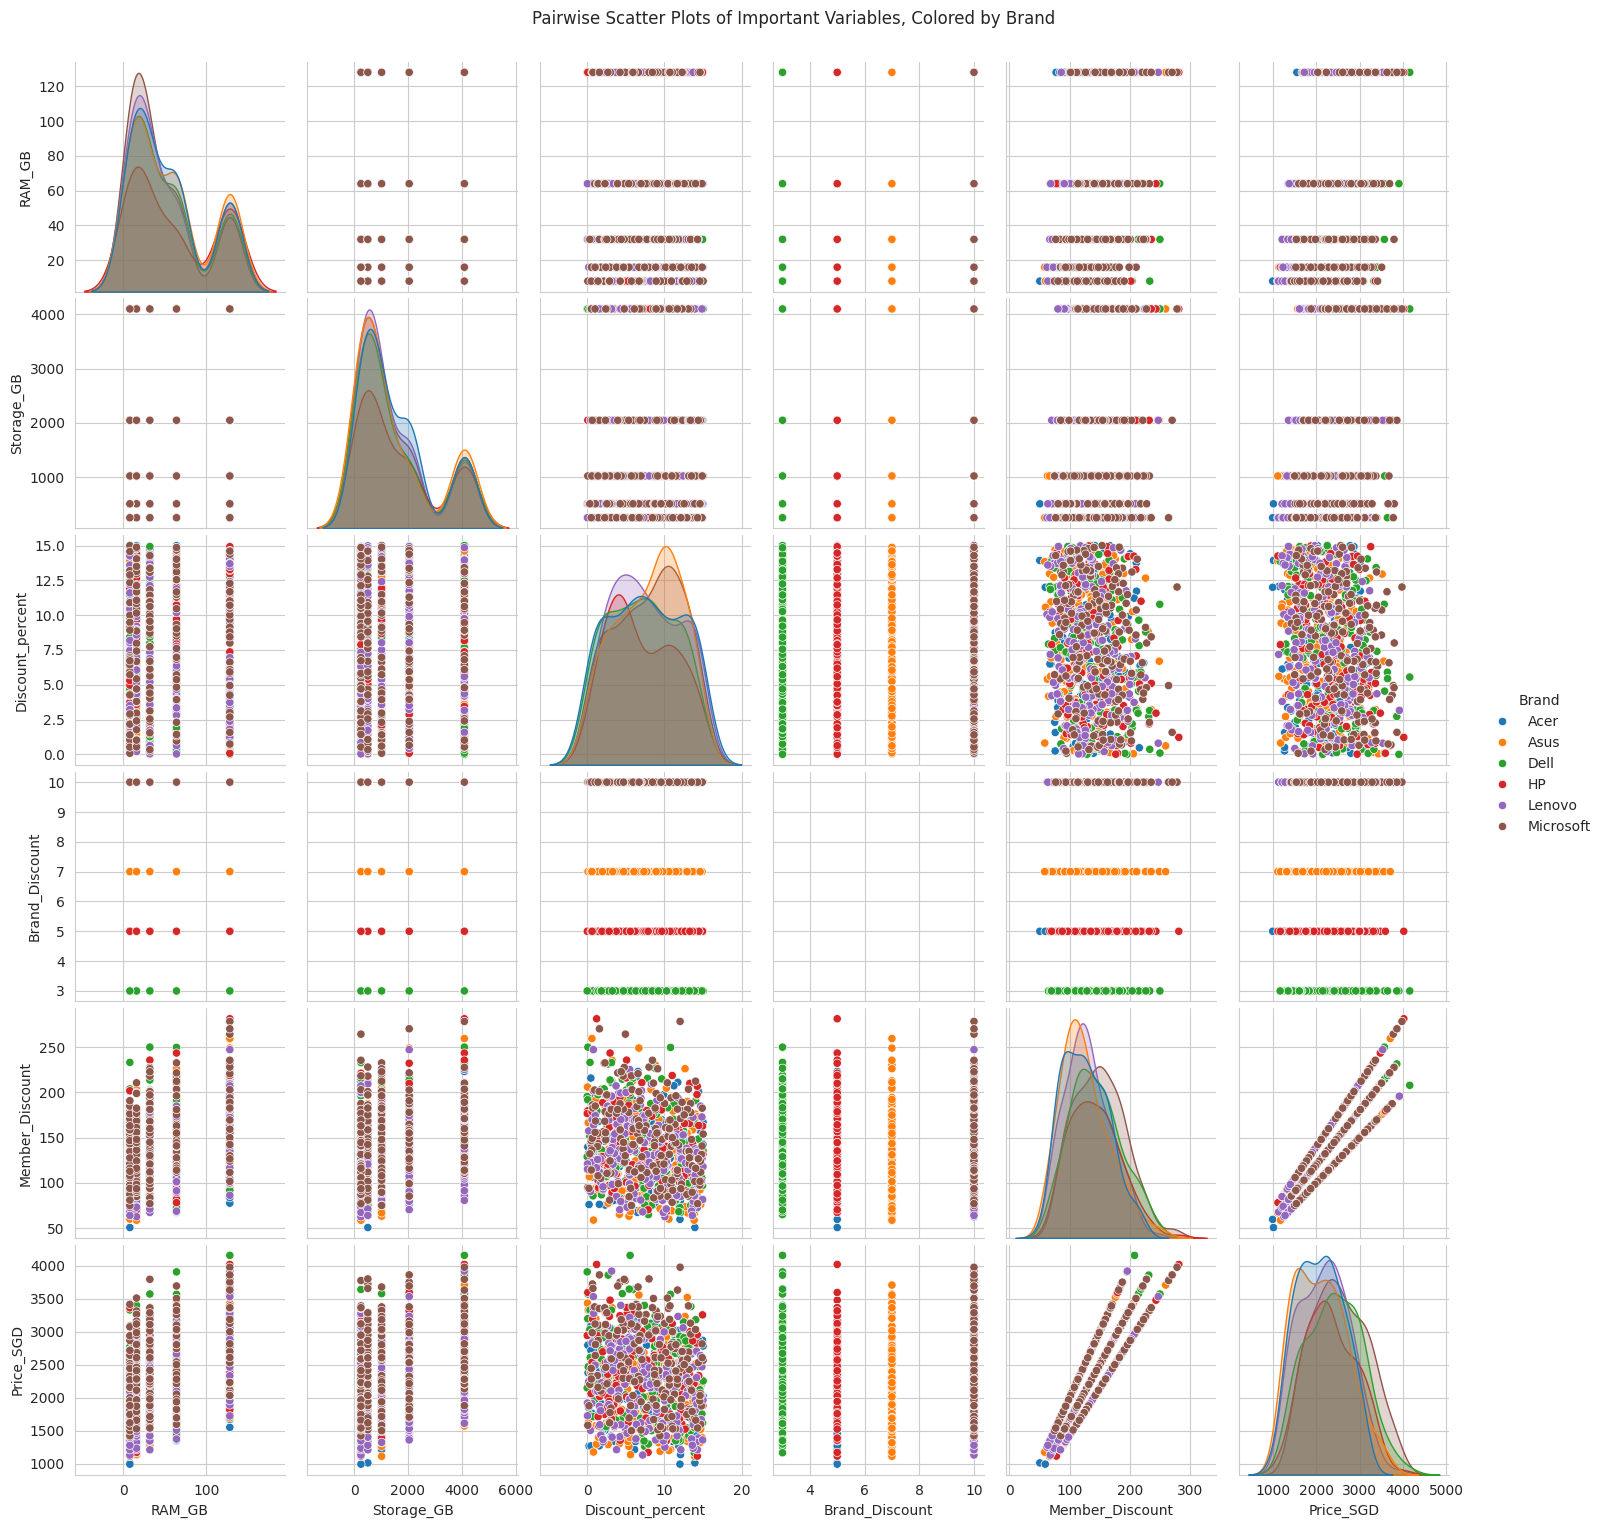

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the subset of important features, including numerical and a categorical one for hue
important_features_for_plot = [
    'RAM_GB', 'Storage_GB', 'Discount_percent',
    'Brand_Discount', 'Member_Discount', 'Price_SGD', 'Brand'
]

# Create a subset DataFrame
df_important = df[important_features_for_plot]

# Generate the pairplot with 'Brand' as hue
plt.figure(figsize=(15, 15))
sns.pairplot(df_important, hue='Brand', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots of Important Variables, Colored by Brand', y=1.02)
plt.show()

### Interpretation of the Pair Plot with Categorical Hue:

*   **Diagonal Plots (KDE)**: These show the probability density estimate for each numerical feature, separated by `Brand`. This helps in understanding the distribution of each feature within different brands.
*   **Off-Diagonal Scatter Plots**: Each off-diagonal plot displays the relationship between two numerical features, with points colored according to their `Brand`.
    *   You can observe if the correlations between numerical features differ across brands (e.g., if a strong positive correlation exists for one brand but is weaker or non-existent for another).
    *   It helps identify if certain brands cluster together in specific regions of the feature space, indicating distinct product strategies or market positioning.

This visualization provides insights into complex interactions where a categorical variable modulates the relationships between numerical features, giving a more nuanced understanding of the data's structure.

**Reasoning**:
To define the independent variables (X) and the target variable (y), I will create a list of the specified important features, then use this list to select columns for X from the DataFrame, and finally select the 'Price_SGD' column for y.



In [14]:
selected_features = ['RAM_GB', 'Storage_GB', 'Brand', 'CPU', 'GPU', 'Discount_percent', 'Brand_Discount', 'Member_Discount']
X = df[selected_features]
y = df['Price_SGD']

print("Independent variables (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)

Independent variables (X) shape: (1000, 8)
Target variable (y) shape: (1000,)


**Reasoning**:
To prepare the categorical features for machine learning models, I will perform one-hot encoding on 'Brand', 'CPU', and 'GPU' columns in the 'X' DataFrame using `pd.get_dummies` and then confirm the new shape of the processed 'X'.



In [15]:
X = pd.get_dummies(X, columns=['Brand', 'CPU', 'GPU'], drop_first=True)
print("Shape of X after one-hot encoding:", X.shape)

Shape of X after one-hot encoding: (1000, 27)


## Final Task

### Subtask:
Confirm that the features are prepared and ready for model training, showing the shape of the processed feature set.


## Summary:

### Q&A
The features are confirmed to be prepared and ready for model training. The shape of the processed feature set is (1000, 27).

### Data Analysis Key Findings
*   Initially, the independent variables \(X\) had a shape of (1000, 8) and the target variable \(y\) had a shape of (1000,).
*   The categorical features 'Brand', 'CPU', and 'GPU' were successfully one-hot encoded.
*   After one-hot encoding, the shape of the independent variables \(X\) increased from (1000, 8) to (1000, 27), indicating the successful creation of new dummy variables.

### Insights or Next Steps
*   The dataset is now preprocessed and ready for machine learning model training, with categorical features appropriately handled.


# Task
Split the processed feature set (X) and the target variable (y) into training and testing sets (80% training, 20% testing). Train a `LinearRegression` model using the training data, then make predictions on the test set. Finally, evaluate the model's performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score, and summarize the results.

## Split Data into Training and Testing Sets

### Subtask:
Divide the processed feature set (X) and the target variable (y) into training and testing sets to evaluate the model's performance on unseen data. A common split is 80% for training and 20% for testing.


**Reasoning**:
To divide the data into training and testing sets, I will import the `train_test_split` function from `sklearn.model_selection` and apply it to the `X` and `y` dataframes with the specified test size and random state, then print the shapes to verify the split.



In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 27)
Shape of X_test: (200, 27)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Train Linear Regression Model

### Subtask:
Initialize and train a `LinearRegression` model from `sklearn.linear_model` using the training data (X_train, y_train).


**Reasoning**:
To train the Linear Regression model, I will import the `LinearRegression` class, instantiate it, and then fit it using the `X_train` and `y_train` datasets.



In [17]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Make Predictions

### Subtask:
Use the trained `LinearRegression` model to make predictions on the test set (`X_test`).

**Reasoning**:
To make predictions, I will use the trained `model` to predict `y_pred` based on the `X_test` data.



In [18]:
y_pred = model.predict(X_test)
print("Predictions made successfully on the test set.")

Predictions made successfully on the test set.


## Visualize Model Performance: Actual vs. Predicted Prices

### Subtask:
Create a scatter plot comparing the actual `Price_SGD` values from the test set (`y_test`) with the predicted `Price_SGD` values (`y_pred`) from the trained Linear Regression model. Include a diagonal line representing perfect predictions for visual comparison.

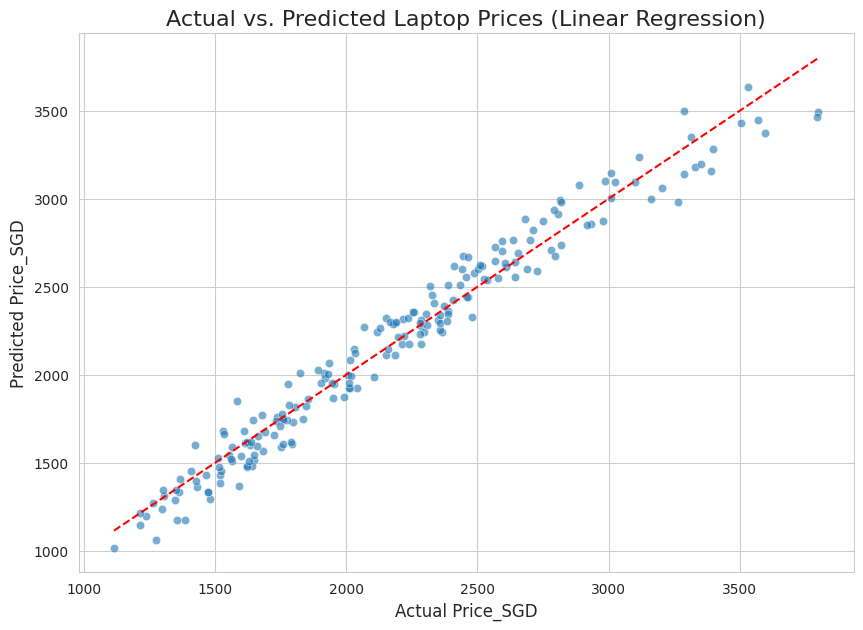

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Laptop Prices (Linear Regression)', fontsize=16)
plt.xlabel('Actual Price_SGD', fontsize=12)
plt.ylabel('Predicted Price_SGD', fontsize=12)
plt.grid(True)
plt.show()

## Evaluate Model Performance

### Subtask:
Evaluate the model's performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score, to quantify the accuracy and explanatory power of the predictions.

**Reasoning**:
To evaluate the model's performance, I will import the necessary metrics from `sklearn.metrics` and calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score, then print them.



In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 91.59
Mean Squared Error (MSE): 12823.60
R-squared (R2) Score: 0.96


## Final Task

### Subtask:
Summarize the model's performance metrics (MAE, MSE, R2 score) and interpret their implications for the predictive accuracy of the `LinearRegression` model.

## Summary:

### Q&A
The `LinearRegression` model's performance was evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score, providing a quantitative assessment of its predictive accuracy.

### Data Analysis Key Findings
*   **Mean Absolute Error (MAE):** The MAE of **91.59** indicates that, on average, the model's predictions for laptop prices deviate from the actual prices by approximately 91.59 SGD. This value gives a direct measure of the average magnitude of the errors.
*   **Mean Squared Error (MSE):** The MSE of **12823.60** represents the average of the squared errors. Since errors are squared, this metric heavily penalizes larger errors. Its square root, the Root Mean Squared Error (RMSE), would be approximately 113.24 SGD, which is in the same units as the target variable and thus easier to interpret.
*   **R-squared (R2) Score:** The R2 score of **0.96** (or 96%) suggests that approximately 96% of the variance in laptop prices can be explained by the independent variables included in the model. This is a very high R2 score, indicating that the model provides an excellent fit to the data and has strong predictive power.

### Insights or Next Steps
*   The model demonstrates high predictive accuracy, as evidenced by the high R2 score, meaning it effectively captures the underlying relationship between the selected features and laptop prices. The MAE and MSE values are relatively low, further supporting the model's good performance.
*   Given the strong performance, this `LinearRegression` model can be considered a reliable tool for predicting laptop prices based on the chosen features.
*   Further steps could involve analyzing the residuals to identify any systematic errors, exploring more complex models for marginal improvements, or deploying this model for practical applications.

## Final Task

### Subtask:
Summarize the performance of the linear regression model and discuss the implications of the evaluation metrics.


## Summary:

### Q&A
The `LinearRegression` model's performance was evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) score, providing a quantitative assessment of its predictive accuracy.

### Data Analysis Key Findings
*   **Mean Absolute Error (MAE):** The model's predictions for laptop prices deviate from the actual prices by approximately 91.59 SGD on average.
*   **Mean Squared Error (MSE):** The MSE is 12823.60, with an approximate Root Mean Squared Error (RMSE) of 113.24 SGD, indicating the average magnitude of the squared errors.
*   **R-squared (R2) Score:** The R2 score of 0.96 (or 96%) suggests that approximately 96% of the variance in laptop prices can be explained by the independent variables in the model, indicating a strong fit.

### Insights or Next Steps
*   The `LinearRegression` model exhibits high predictive accuracy and effectively captures the relationship between features and laptop prices, making it a reliable tool for price prediction.
*   Further analysis could involve examining residuals for systematic errors, investigating more complex models for potential marginal improvements, or deploying the current model for practical applications.
